In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/fer/Documents/cfDNA/Clinical/VariantCounts.csv')
#df.dropna(subset = ["cfDNA_concentration"], inplace=True)
df.head()

,Unnamed: 0,ID,Age,Stadium,Sex,ResponseQX,Histological,Tumor_progression,T,N,TumorFraction,SubMolec,cfDNA_concentration,CNV_all,CNV_cfDNA,CNV_tumor,SNV_all,CNV_cfDNASNV,All,Status
0,0.0,UEB_0205,76.0,IA,Female,Partial,IDC,Remission,1.0,0,0.00000,NaN,0.81,7.0,0.0,7.0,1.0,1.0,8.0,Paired
1,1.0,UEB_0208,55.0,IA,Female,Complete,IDC,Remission,1.0,0,0.01832,NaN,0.88,8.0,4.0,4.0,1.0,5.0,9.0,Paired
2,2.0,UEB_0209,51.0,IIA,Female,NaN,IDC,Remission,2.0,0,0.01756,NaN,0.36,32.0,15.0,17.0,0.0,15.0,32.0,Paired
3,3.0,UEB_0210,55.0,IIA,Female,Partial,IDC,NaN,2.0,0,0.01458,Luminal B Like HER2+,1.27,28.0,21.0,7.0,0.0,21.0,28.0,Paired
4,4.0,UEB_0211,68.0,IIIC,Male,Partial,IDC,Active disease,4.0,1,0.02001,NaN,1.07,24.0,11.0,13.0,0.0,11.0,24.0,Paired


In [3]:
df['All'].std()

11.077110677084567

In [4]:
#df[df['CNV_cfDNA']!=0]

<AxesSubplot:xlabel='ID'>

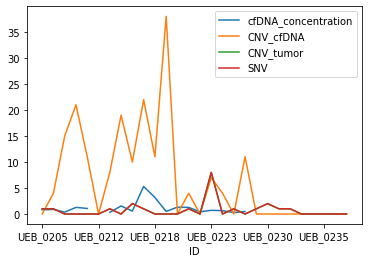

In [5]:
df_3 = pd.DataFrame({
    'cfDNA_concentration': df.cfDNA_concentration,
    'CNV_cfDNA':df.CNV_cfDNA,
    'CNV_tumor': df.SNV_all,
    'SNV':df.SNV_all,
    'ID':df.ID
})
df_3 = df_3.set_index('ID')
df_3.plot()

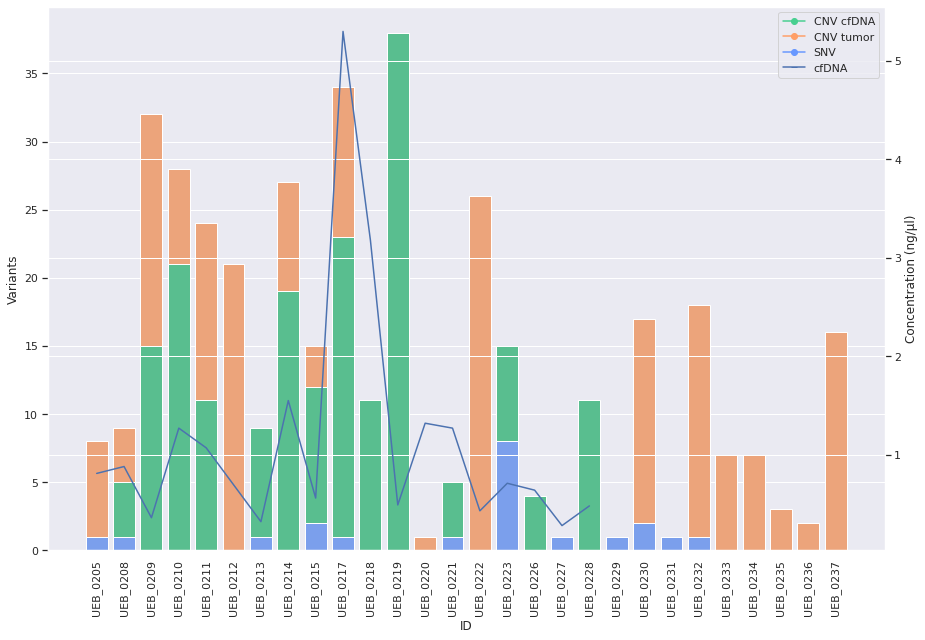

In [6]:
#sns.set(style="whitegrid")
from matplotlib.lines import Line2D
sns.set_theme(color_codes=True)
sns.set(rc = {'figure.figsize':(15,10)})

ax = sns.barplot(x = 'ID', y = 'All', data = df, color = "#ff9f68")
ax = sns.barplot(x = 'ID', y = 'CNV_cfDNASNV', data = df, color = "#48cf90")
ax = sns.barplot(x = 'ID', y = 'SNV_all', data = df, color = "#6898ff")

ax2 = sns.lineplot(data=df.cfDNA_concentration, color="b", ax=ax.axes.twinx())

ax2.legend(handles=[Line2D([], [], color="#48cf90",  marker='o', label='CNV cfDNA'), 
                   Line2D([], [], marker='o', color="#ff9f68", label='CNV tumor'), 
                  Line2D([], [], marker='o', color="#6898ff", label='SNV'),
                   Line2D([], [], marker='_', color="b", label='cfDNA')
                  ])

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(ylabel = "Variants")
ax2.set(ylabel = "Concentration (ng/μl)")
p = ax2.figure
p.savefig('/home/fer/Variants.pdf', dpi = 3000)

# Individual CNV

In [13]:
# df with CNV in cfDNA
df = pd.read_csv('/home/fer/Documents/cfDNA/Clinical/VariantCounts.csv')
df.dropna(subset = ["ID"], inplace=True)
df = df[df['ID']!= 'UEB_0227']
df = df[df['ID']!= 'UEB_0229']
df = df[df['ID']!= 'UEB_0231']
df

,Unnamed: 0,ID,Age,Stadium,Sex,ResponseQX,Histological,Tumor_progression,T,N,TumorFraction,SubMolec,cfDNA_concentration,CNV_all,CNV_cfDNA,CNV_tumor,SNV_all,CNV_cfDNASNV,All,Status
0,0.0,UEB_0205,76.0,IA,Female,Partial,IDC,Remission,1.0,0,0.00000,NaN,0.81,7.0,0.0,7.0,1.0,1.0,8.0,Paired
1,1.0,UEB_0208,55.0,IA,Female,Complete,IDC,Remission,1.0,0,0.01832,NaN,0.88,8.0,4.0,4.0,1.0,5.0,9.0,Paired
2,2.0,UEB_0209,51.0,IIA,Female,NaN,IDC,Remission,2.0,0,0.01756,NaN,0.36,32.0,15.0,17.0,0.0,15.0,32.0,Paired
3,3.0,UEB_0210,55.0,IIA,Female,Partial,IDC,NaN,2.0,0,0.01458,Luminal B Like HER2+,1.27,28.0,21.0,7.0,0.0,21.0,28.0,Paired
4,4.0,UEB_0211,68.0,IIIC,Male,Partial,IDC,Active disease,4.0,1,0.02001,NaN,1.07,24.0,11.0,13.0,0.0,11.0,24.0,Paired
5,26.0,UEB_0212,NaN,IA,Female,Complete,Phyllodes,Remission,1.0,0,NaN,NaN,NaN,21.0,0.0,21.0,0.0,0.0,21.0,NotPaired
6,5.0,UEB_0213,42.0,IIA,Female,Partial,IDC,Remission,2.0,0,0.01495,NaN,0.32,8.0,8.0,0.0,1.0,9.0,9.0,Paired
7,6.0,UEB_0214,68.0,NaN,Female,NaN,Phyllodes,Remission,NaN,NaN,0.01339,NaN,1.55,27.0,19.0,8.0,0.0,19.0,27.0,Paired
8,7.0,UEB_0215,61.0,IIIC,Female,NaN,IDC,Remission,4.0,3,0.01796,Luminal A,0.56,13.0,10.0,3.0,2.0,12.0,15.0,Paired
9,8.0,UEB_0217,49.0,NaN,Female,Partial,Phyllodes,Remission,NaN,NaN,0.01355,NaN,5.30,33.0,22.0,11.0,1.0,23.0,34.0,Paired


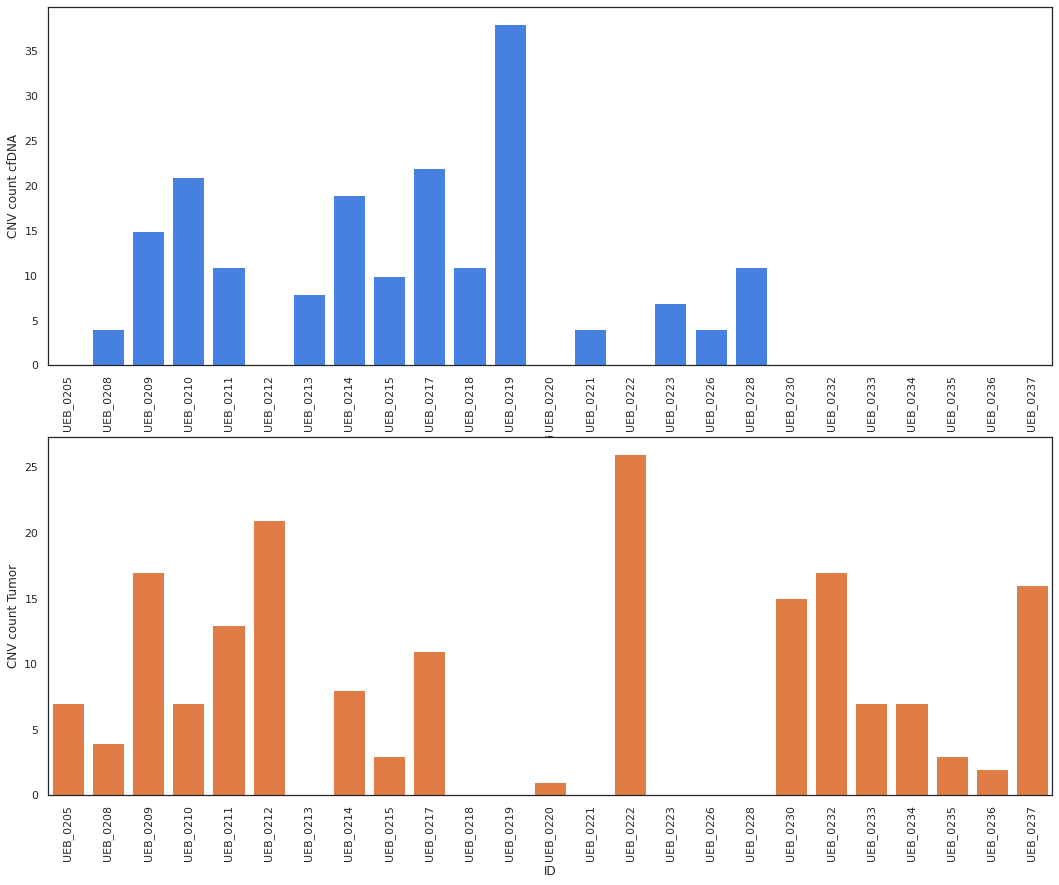

In [18]:
import seaborn as sns
sns.set_theme(style='white')
fig, axes = plt.subplots(2, 1, figsize=(18, 14.5))

sns.barplot(ax = axes[0], data =  df, x = 'ID', y = 'CNV_cfDNA', color = '#2c7afa')
axes[0].set(ylabel = "CNV count cfDNA")
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(ax = axes[1], data =  df, x = 'ID', y = 'CNV_tumor', color = '#fa742c')
axes[1].set(ylabel = "CNV count Tumor")
axes[1].tick_params(axis='x', rotation=90)

fig.savefig("/home/fer/CNV_count.pdf")

# Only cfDNA cncentration

In [4]:
import numpy as np
df.dropna(subset = ["cfDNA_concentration"], inplace=True)
df = df.sort_values(by=['cfDNA_concentration'], ascending = True)
df

,Unnamed: 0,ID,Age,Stadium,Sex,ResponseQX,Histological,Tumor_progression,T,N,TumorFraction,SubMolec,cfDNA_concentration,CNV_all,CNV_cfDNA,CNV_tumor,SNV_all,CNV_cfDNASNV,All,Status
17,16.0,UEB_0227,81.0,IIIB,Female,NaN,Lobular,Active disease,4.0,0,NaN,NaN,0.28,0.0,0.0,0.0,1.0,1.0,1.0,Paired
6,5.0,UEB_0213,42.0,IIA,Female,Partial,IDC,Remission,2.0,0,0.01495,NaN,0.32,8.0,8.0,0.0,1.0,9.0,9.0,Paired
2,2.0,UEB_0209,51.0,IIA,Female,NaN,IDC,Remission,2.0,0,0.01756,NaN,0.36,32.0,15.0,17.0,0.0,15.0,32.0,Paired
14,13.0,UEB_0222,73.0,IIA,Female,NaN,IDC,Remission,2.0,1,0.00000,NaN,0.43,26.0,0.0,26.0,0.0,0.0,26.0,Paired
18,17.0,UEB_0228,60.0,NaN,Female,NaN,IDC,Active disease,2.0,1,0.01414,NaN,0.48,11.0,11.0,0.0,0.0,11.0,11.0,Paired
11,10.0,UEB_0219,70.0,IIIB,Female,NaN,NaN,Remission,4.0,0,0.01263,NaN,0.49,38.0,38.0,0.0,0.0,38.0,38.0,Paired
8,7.0,UEB_0215,61.0,IIIC,Female,NaN,IDC,Remission,4.0,3,0.01796,Luminal A,0.56,13.0,10.0,3.0,2.0,12.0,15.0,Paired
16,15.0,UEB_0226,NaN,NaN,Female,NaN,Phyllodes,Remission,NaN,NaN,0.01454,NaN,0.64,4.0,4.0,0.0,0.0,4.0,4.0,Paired
15,14.0,UEB_0223,49.0,IIA,Female,NaN,Mucinous,Remission,2.0,0,0.02047,Luminal A,0.71,7.0,7.0,0.0,8.0,15.0,15.0,Paired
0,0.0,UEB_0205,76.0,IA,Female,Partial,IDC,Remission,1.0,0,0.00000,NaN,0.81,7.0,0.0,7.0,1.0,1.0,8.0,Paired


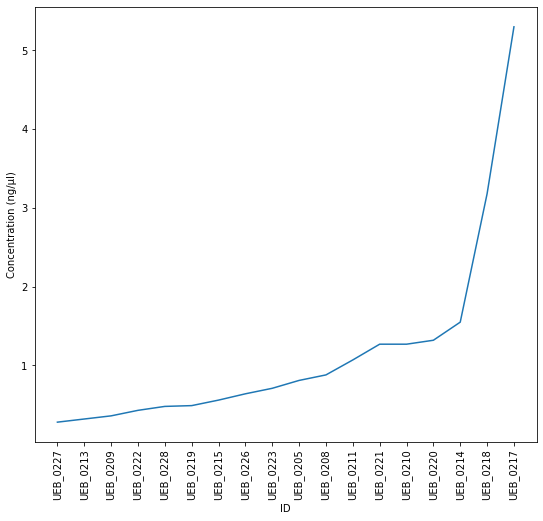

In [13]:
#sns.set(rc = {'figure.figsize':(15,10)})

plt.figure(figsize=(9, 8))

ax = sns.lineplot(data=df, x="ID", y="cfDNA_concentration")
ax.set(ylabel = "Concentration (ng/μl)")
ax.tick_params(axis='x', rotation=90)
plt.savefig('/home/fer/cfDNAConcentration.pdf', dpi = 300)

In [101]:
df['Stage']= df['Stadium'].replace(['IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC'],['I', 'II', 'II', 'III', 
                                                                   'III', 'III'])

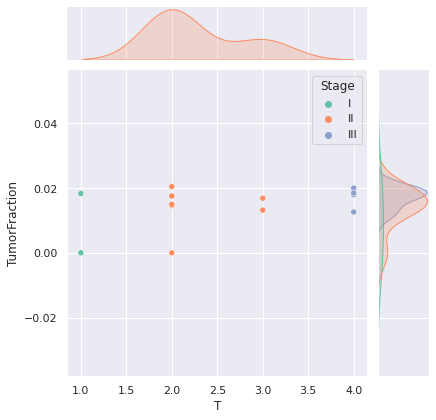

In [116]:
sns.set_theme(color_codes=True)
sns.jointplot(data=df, x="T", y="TumorFraction", hue="Stage", palette = "Set2")

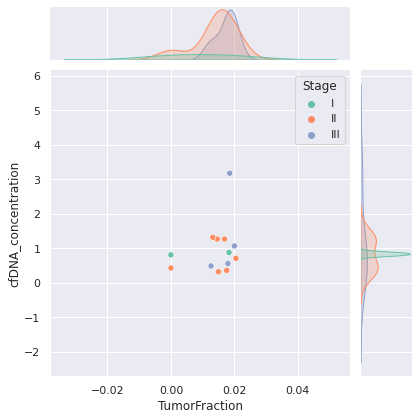

In [103]:
sns.jointplot(data=df, x="TumorFraction", y="cfDNA_concentration", hue="Stage", palette = "Set2")

<AxesSubplot:xlabel='Histological', ylabel='cfDNA_concentration'>

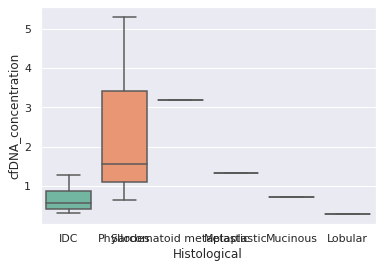

In [104]:
sns.boxplot(data=df, x='Histological', y='cfDNA_concentration', palette = "Set2")


<AxesSubplot:xlabel='SubMolec', ylabel='cfDNA_concentration'>

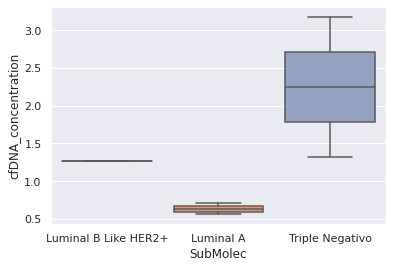

In [120]:
sns.boxplot(data=df, x='SubMolec', y='cfDNA_concentration', palette = "Set2")

<AxesSubplot:xlabel='ResponseQX', ylabel='cfDNA_concentration'>

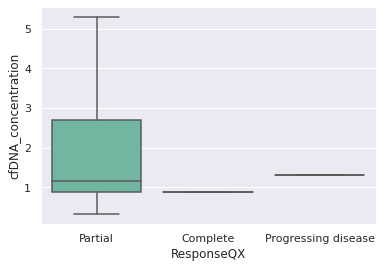

In [105]:
sns.boxplot(data=df, x='ResponseQX', y='cfDNA_concentration', palette = "Set2")

In [ ]:
sns.boxplot(data=df, x='Stage', y='T', palette = "Set2")

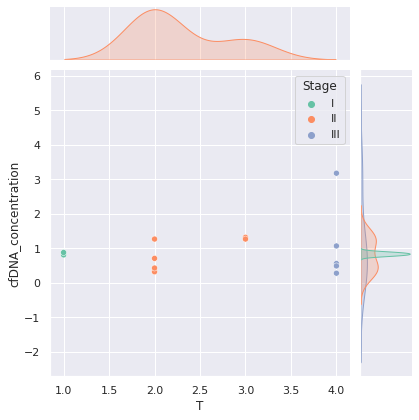

In [119]:
sns.jointplot(data=df, x='T', y="cfDNA_concentration", hue="Stage", palette = "Set2")

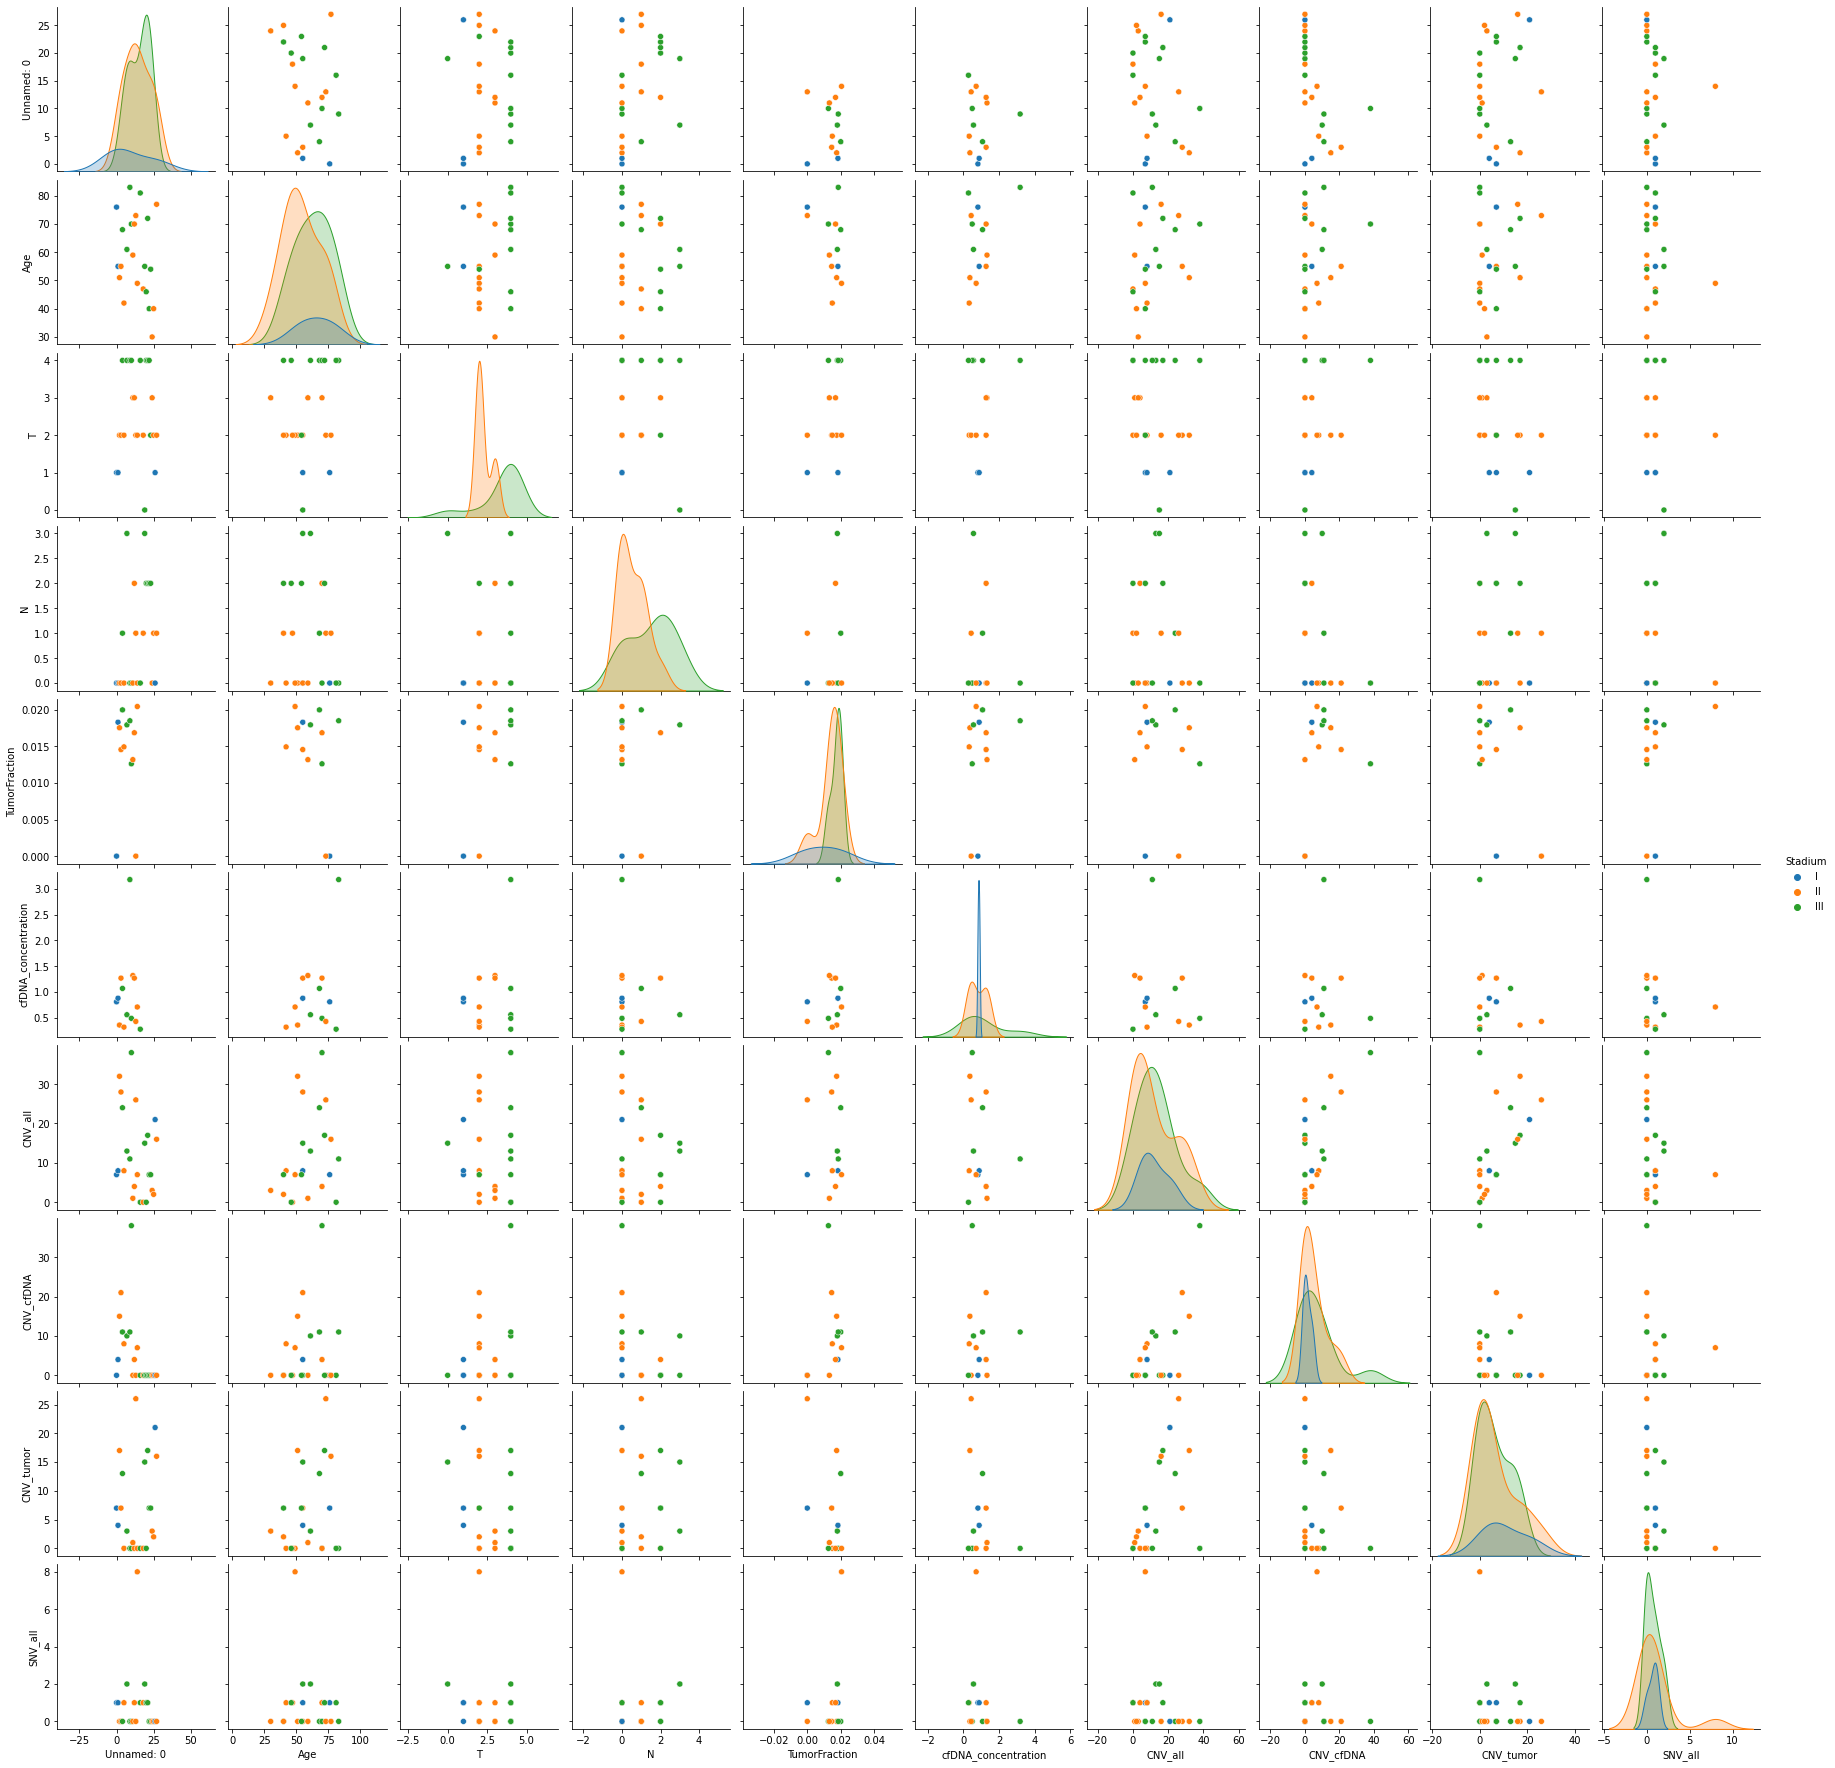

In [16]:

p = sns.pairplot(df, hue = 'Stadium')
p.savefig('/home/fer/LinearReg.pdf', dpi=300)

# Comparación de clasificadores

In [61]:
df.dropna(subset = ["cfDNA_concentration"], inplace=True)
df

,Unnamed: 0,ID,Age,Stadium,Sex,ResponseQX,Histological,Tumor_progression,T,N,TumorFraction,SubMolec,cfDNA_concentration,CNV_all,CNV_cfDNA,CNV_tumor,SNV_all
0,0,UEB_0205,76.0,1.0,Female,Partial,IDC,Remission,1.0,0.0,0.00000,NaN,0.81,7,0,7,1
1,1,UEB_0208,55.0,1.0,Female,Complete,IDC,Remission,1.0,0.0,0.01832,NaN,0.88,8,4,4,1
2,2,UEB_0209,51.0,2.0,Female,NaN,IDC,Remission,2.0,0.0,0.01756,NaN,0.36,32,15,17,0
3,3,UEB_0210,55.0,2.0,Female,Partial,IDC,NaN,2.0,0.0,0.01458,Luminal B Like HER2+,1.27,28,21,7,0
4,4,UEB_0211,68.0,3.0,Male,Partial,IDC,Active disease,4.0,1.0,0.02001,NaN,1.07,24,11,13,0
5,5,UEB_0213,42.0,2.0,Female,Partial,IDC,Remission,2.0,0.0,0.01495,NaN,0.32,8,8,0,1
6,6,UEB_0214,68.0,0.0,Female,NaN,Phyllodes,Remission,NaN,NaN,0.01339,NaN,1.55,27,19,8,0
7,7,UEB_0215,61.0,3.0,Female,NaN,IDC,Remission,4.0,3.0,0.01796,Luminal A,0.56,13,10,3,2
8,8,UEB_0217,49.0,0.0,Female,Partial,Phyllodes,Remission,NaN,NaN,0.01355,NaN,5.30,33,22,11,1
9,9,UEB_0218,83.0,3.0,Female,Partial,Sarcomatoid metaplastic,Remission,4.0,0.0,0.01852,Triple Negativo,3.18,11,11,0,0


In [70]:
import numpy as np
df['Stadium']= df['Stadium'].replace(['I', 'II', 'II', 'III', 'III', 'III', np.nan], 
                                    [1,2,2,3,3,3,0])

df2 = pd.DataFrame({'cfDNA': df.cfDNA_concentration,
                    'T': df['T']})
df2['T']= df['T'].replace([np.nan], [0])
df2['cfDNA']= df2['cfDNA'].replace([np.nan], [0])

X = np.array(df2)
y = np.array(df.Stadium)
y

array([1., 1., 2., 2., 3., 2., 0., 3., 0., 3., 3., 2., 2., 2., 2., 0., 3.,
       0.])

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

In [71]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    #"QDA",
]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=1, C=1, degree=3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    #QuadraticDiscriminantAnalysis(),
]

#X, y = make_classification(
#    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
#)
#rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

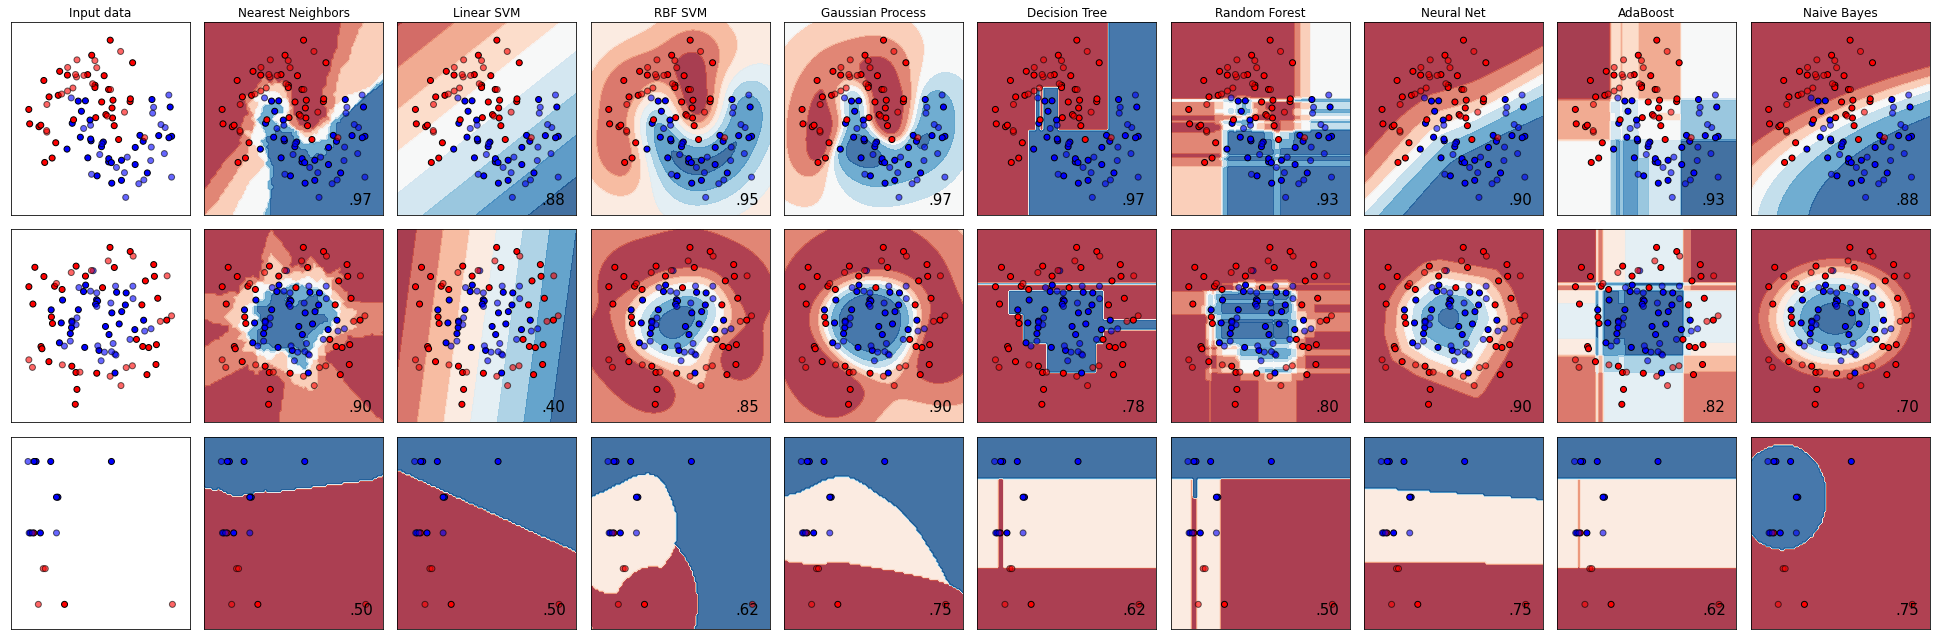

In [72]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [75]:
from sklearn import svm, datasets
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [76]:
h = .01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']


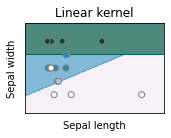

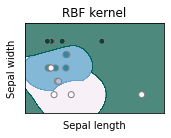

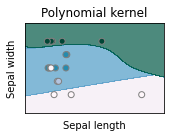

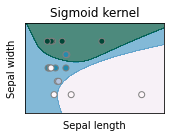

In [77]:
for i, clf in enumerate((linear, rbf, poly, sig)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(2, 2, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PuBuGn,edgecolors='grey')    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])    
    plt.show()